PART 1

In [1]:
import sys
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [ ]:
#Taking input of test file path
testfile = sys.argv[1]

In [2]:
#Assigning column names to data

col_names = ['ID', 'Age', 'Experience', 'Annual income', 'ZIPCode', 'Family size','Avg spending','Education level','Mortgage', 'Last accepted', 'securities', 'cd', 'internet banking','credit card']
loan = pd.read_csv('C:/Users/sarat/Desktop/assignment 2/LoanDataset/data.csv',header = None,names = col_names)
loan = loan[1:]

In [3]:
#Dropping un-necessary columns

drop_columns = ['ID']
loan = loan.drop(drop_columns,1)

In [4]:
#For identifying categorial and numerical attributes

categorial = ['Education level', 'securities', 'cd','Family size', 'internet banking','credit card']
numerical = ['Age','Experience','Annual income','Avg spending','Mortgage']

In [5]:
X = loan
Y = loan['Last accepted']

In [6]:
# Split data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
X_test = X_test.drop('Last accepted',1)

In [7]:
#Calculates mean of given list of data

def mean(column):
    return sum(column)/float(len(column))

In [8]:
#Calculates standard deviation of list of data

def sd(column):
    m = mean(column)
    var = sum([pow(x-m,2) for x in column])/float(len(column)-1)
    return math.sqrt(var)

In [9]:
#Calculates Gaussian distribution of particular value

def prob(x, m, var):
    e = math.exp(-(math.pow(x-m,2)/(2*math.pow(var,2))))
    return (1/(math.sqrt(2*math.pi)*var))*e

In [10]:
#Utility function which returns dictionary that contains numerical attributes as keys and respective 
#mean and standard deviation for a paricular outcome

def num_data_prep():
    num_data = {}
    for i in numerical:
        num_data[i] = {}
        num_data[i][1] ={}
        num_data[i][0] = {}
        num_data[i][1]['mean'] = mean(list(X_train[i].iloc[np.where(X_train['Last accepted']==1.0)]))
        num_data[i][1]['sd'] =  sd(list(X_train[i].iloc[np.where(X_train['Last accepted']==1.0)]))
        num_data[i][0]['mean'] = mean(list(X_train[i].iloc[np.where(X_train['Last accepted']==0.0)]))
        num_data[i][0]['sd'] =  sd(list(X_train[i].iloc[np.where(X_train['Last accepted']==0.0)]))
    return num_data

In [11]:
#Utility function which returns dictionary that contains categorial attributes as keys and respective 
#mean and standard deviation for a paricular outcome

def cat_data_prep():
    cat_data = {}
    for i in categorial:
        cat_data[i] = {}
        for j in set(X_train[i]):
            cat_data[i][j] = {}
            py = len(np.where((X_train['Last accepted']==1.0) & (X_train[i]==j))[0])/float(len(np.where(X_train['Last accepted']==1.0)[0]))
            pn = len(np.where((X_train['Last accepted']==0.0) & (X_train[i]==j))[0])/float(len(np.where(X_train['Last accepted']==0.0)[0]))
            cat_data[i][j][1] = py
            cat_data[i][j][0] = pn
    return cat_data        

Prediction function which takes testing dataset and implement naive bayes classifier to predict the class that particluar dataset belongs to.

First it identifies whether the attribute is categorial or numerical.

If it is numerical, it calculates the gaussian distribution on particular attribute value with mean and standard deviation values that are already calculated using num_data_prep function.

If it is categorial, it calculates probability by using cat_data_prep function.

Finally it selects class which gives maximum probability of occurance.

In [12]:
def predict_function(X_test):
    num_data = num_data_prep()
    cat_data = cat_data_prep()
    test = ['Age','Experience','Annual income', 'Family size','Avg spending','Education level','Mortgage','securities','cd','internet banking','credit card']
    Y_pred = []
    for i in range(len(X_test)):
        opr = 1
        zpr = 1
        for j in test:
            if j in numerical:
                opr*=prob(X_test.iloc[i][j],num_data[j][1]['mean'],num_data[j][1]['sd'])
                zpr*=prob(X_test.iloc[i][j],num_data[j][0]['mean'],num_data[j][0]['sd'])
            else:
                opr*=cat_data[j][X_test.iloc[i][j]][1]
                zpr*=cat_data[j][X_test.iloc[i][j]][0]
        
        #Multiplyting prob(Yes) and prob(No) to respective values
        opr*=len(np.where(X_train['Last accepted']==1.0)[0])/float(len(X_train))
        zpr*=len(np.where(X_train['Last accepted']==0.0)[0])/float(len(X_train)) 
        if(opr > zpr):
            Y_pred.append(1)
        else:
            Y_pred.append(0)
    return Y_pred

In [13]:
Y_pred = predict_function(X_test)

In [14]:
#Compare function to compare predicted and test values of testing dataset

def compare(Y_test,Y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(Y_test)):
        if(Y_test[i]==Y_pred[i]):
            if(Y_test[i] == 1):
                tp+=1
            else:
                tn+=1
        else:
            if(Y_pred[i]==1):
                fp+=1
            else:
                fn+=1
    precision = tp/float(tp+fp)
    recall = tp/float(tp+fn)
    accuracy = (tp+tn)/float(tp+tn+fp+fn)
    error_rate = (fp+fn)/float(tp+tn+fp+fn)
    print("Precision : ",precision)
    print("Recall : ",recall)
    print("Accuracy : ",accuracy)
    print("Error rate : ",error_rate)
    return accuracy

In [15]:
print("-------validation-------")
compare(Y_pred,list(Y_test))

-------validation-------
Precision :  0.6395348837209303
Recall :  0.4661016949152542
Accuracy :  0.8955555555555555
Error rate :  0.10444444444444445


0.8955555555555555

In [ ]:
#For testing data:
tloan = pd.read_csv(testfile,header = None,names = col_names)
tloan = tloan.drop('ID',1)
tx = tloan.drop('Last accepted',1)
ty = tloan['Last accepted']
yp = predict_function(tx)
print("------------- For Test data -----------")
compare(yp,list(ty))

PART 2

Observations: From the below graph, we can observe that as training dataset size increases, the accuracy on test data will                   increase.

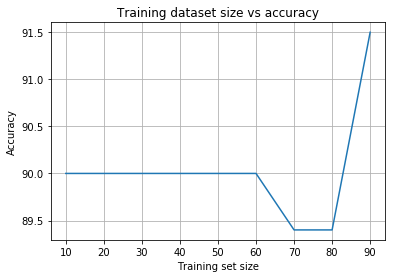

In [16]:
#plotting graph with training dataset size on X-axis and accuracy of test set on y-axis

x = [10,20,30,40,50,60,70,80,90]
y = [90,90,90,90,90,90,89.4,89.4,91.5]
plt.plot(x,y)
plt.title("Training dataset size vs accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.grid(True)